In [82]:
#Importing dependancies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [83]:
#Importing the CSV file
file_one = Path("Data.csv")
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
file_one_df

,Unnamed: 0,ORIGIN_AIRPORT_ID,Description,Code.y,Unnamed: 0_x,OP_UNIQUE_CARRIER,airline_name,Unnamed: 0_y,YEAR,MONTH,...,ARR_DEL15,ARR_DELAY_GROUP,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,0,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,236754,2018,1,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,237277,2018,1,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,237781,2018,1,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,3,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,759132,2018,3,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,10140.0,"Albuquerque, NM: Albuquerque International Sun...",ABQ,2,AS,Alaska,759644,2018,3,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359971,2359971,15991.0,"Yakutat, AK: Yakutat Airport",YAK,2,AS,Alaska,18947117,2022,7,...,0.0,-2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2359972,2359972,15991.0,"Yakutat, AK: Yakutat Airport",YAK,2,AS,Alaska,19075294,2022,7,...,0.0,-2.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2359973,2359973,15991.0,"Yakutat, AK: Yakutat Airport",YAK,2,AS,Alaska,19075304,2022,7,...,0.0,-1.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2359974,2359974,15991.0,"Yakutat, AK: Yakutat Airport",YAK,2,AS,Alaska,19075938,2022,7,...,0.0,0.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


# Creating the tables for each airline - Alaska, Frontier & Spirit

### Creating the clean table for Alaska Airlines

In [84]:
#Creating a rough table for analysis
alaska_rough = file_one_df.loc[file_one_df["airline_name"]=="Alaska",:]
alaska = alaska_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_alaska = alaska.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_alaska = alaska.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
alaska_df = pd.merge(dep_delay_alaska,arr_delay_alaska, on=["YEAR", "MONTH"], how="left")
alaska_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]
alaska_df

,Year,Month,Departure Delay,Arrival Delay
0,2018,1,-2.0,-7.0
1,2018,2,-1.0,-4.0
2,2018,3,-1.0,-4.0
3,2018,4,2.0,-0.0
4,2018,5,3.0,2.0
5,2018,6,3.0,-0.0
6,2018,7,3.0,0.0
7,2018,8,8.0,7.0
8,2018,9,0.0,-3.0
9,2018,10,3.0,1.0


In [85]:
# max_dep = alaska_df["Departure Delay"].max()
# min_dep = alaska_df["Departure Delay"].min()
# max_arr = alaska_df["Arrival Delay"].max()
# min_arr = alaska_df["Arrival Delay"].min()
# print(max_dep, min_dep, max_arr, min_arr)

15.0 -9.0 13.0 -20.0


### Creating the clean table for Frontier Airlines

In [86]:
#Creating a rough table for analysis
frontier_rough = file_one_df.loc[file_one_df["airline_name"]=="Frontier",:]
frontier = frontier_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_frontier = frontier.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_frontier = frontier.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
frontier_df = pd.merge(dep_delay_frontier,arr_delay_frontier, on=["YEAR", "MONTH"], how="left")
frontier_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]

In [87]:
# max_dep = frontier_df["Departure Delay"].max()
# min_dep = frontier_df["Departure Delay"].min()
# max_arr = frontier_df["Arrival Delay"].max()
# min_arr = frontier_df["Arrival Delay"].min()
# print(max_dep, min_dep, max_arr, min_arr)

30.0 -8.0 26.0 -18.0


### Creating the clean table for Spirit Airlines

In [88]:
#Creating a rough table for analysis
spirit_rough = file_one_df.loc[file_one_df["airline_name"]=="Spirit",:]
spirit = spirit_rough[["YEAR","MONTH","DEP_DELAY","ARR_DELAY"]]

#Calculating the mean of arrival and departure delays in each month of the year
dep_delay_spirit = spirit.groupby(['YEAR','MONTH'])["DEP_DELAY"].mean().round(0).reset_index()
arr_delay_spirit = spirit.groupby(['YEAR','MONTH'])["ARR_DELAY"].mean().round(0).reset_index()

#Merging both DataFrames to create the final table
spirit_df = pd.merge(dep_delay_spirit,arr_delay_spirit, on=["YEAR", "MONTH"], how="left")
spirit_df.columns = ["Year", "Month", "Departure Delay", "Arrival Delay"]

In [89]:
# max_dep = spirit_df["Departure Delay"].max()
# min_dep = spirit_df["Departure Delay"].min()
# max_arr = spirit_df["Arrival Delay"].max()
# min_arr = spirit_df["Arrival Delay"].min()
# print(max_dep, min_dep, max_arr, min_arr)

25.0 -3.0 21.0 -13.0


# Plotting the graphs for Months vs Number of Delays for all the Airlines

## I. Alaska Airlines

### - for Departure Delays

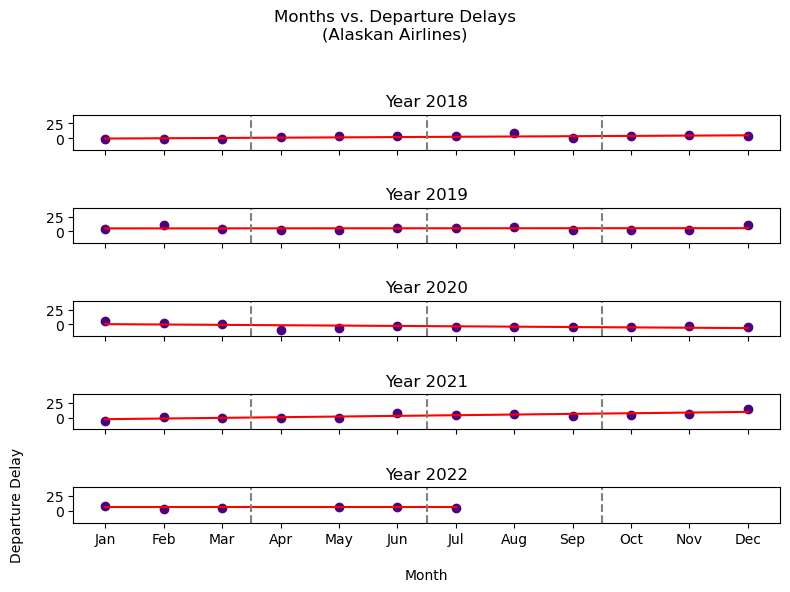

In [105]:
years = alaska_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = alaska_df[alaska_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Alaskan Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

### - Arrival Delays

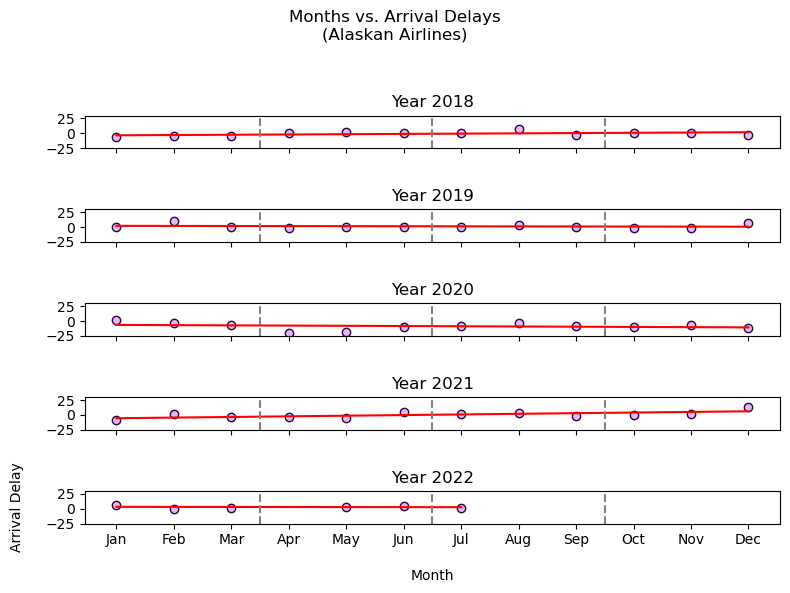

In [106]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = alaska_df[alaska_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    ax.set_ylim(-25, 30)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Alaskan Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

## II. Frontier Airlines

### - Departure Delays

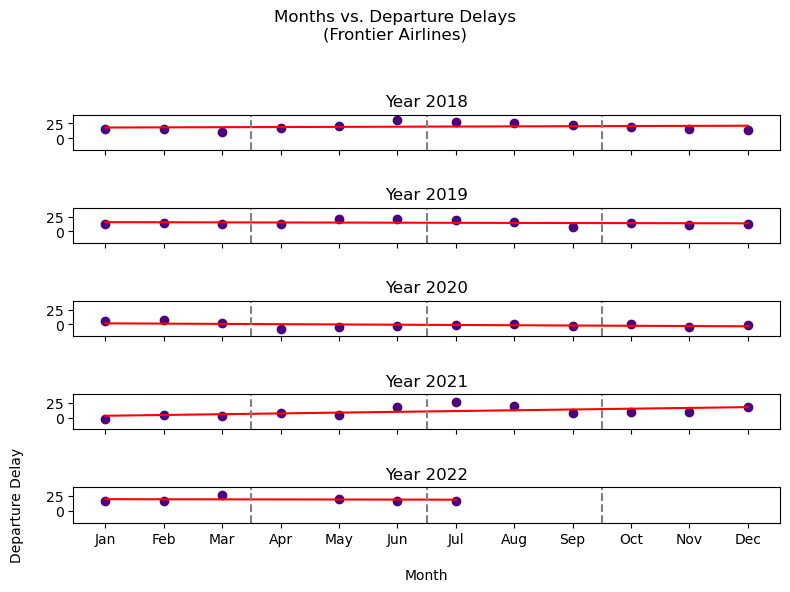

In [104]:
years1 = frontier_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years1):
    #To choose the year in the DataFrame
    data = frontier_df[frontier_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

### - Arrival Delays

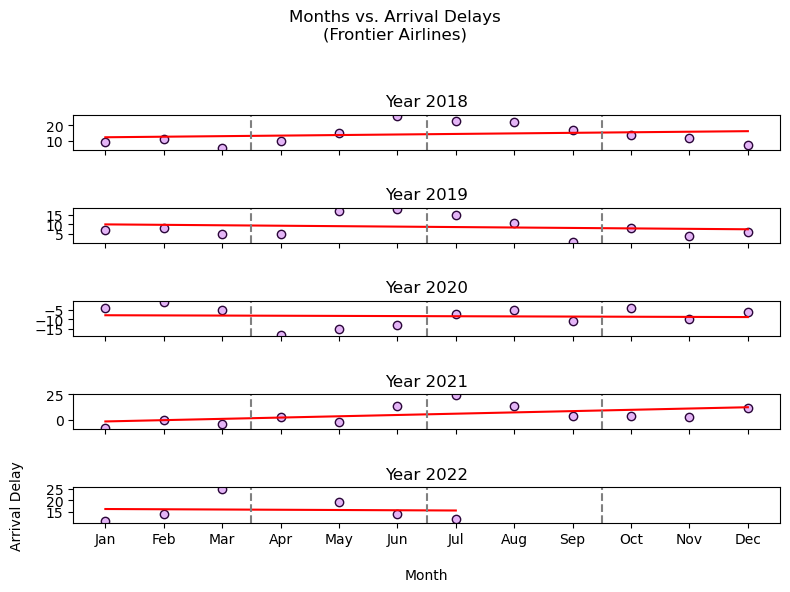

In [93]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years1):
    #To choose the year in the DataFrame
    data = frontier_df[frontier_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    ax.set_ylim(-25, 30)
    
#     ax.set_ylim(data['Departure Delay'].min(), data['Departure Delay'].max())
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

## III. Spirit Airlines

### - Departure Delays

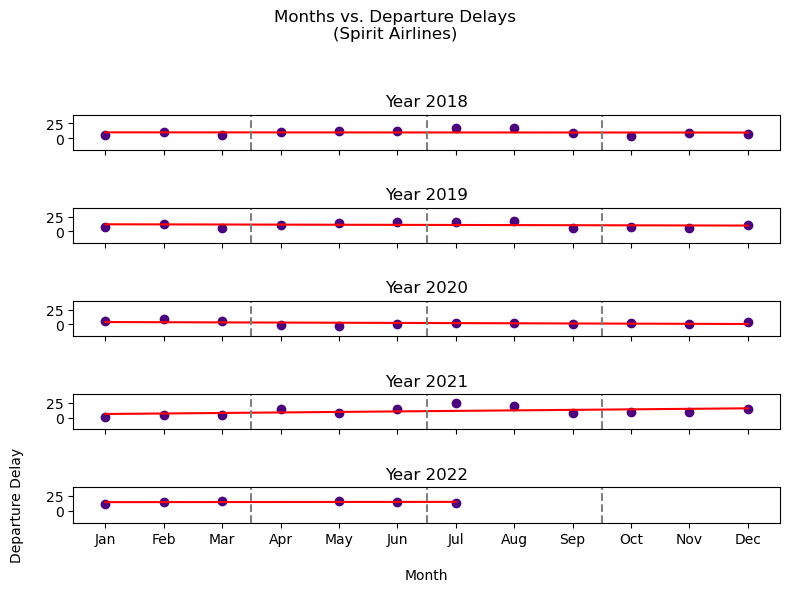

In [107]:
years2 = spirit_df["Year"].unique()

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years):
    #To choose the year in the DataFrame
    data = spirit_df[spirit_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Departure Delay'], color = "#4c027d")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Departure Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    ax.set_ylim(-20, 40)
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Departure Delay\n')
fig.suptitle("Months vs. Departure Delays\n(Spirit Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

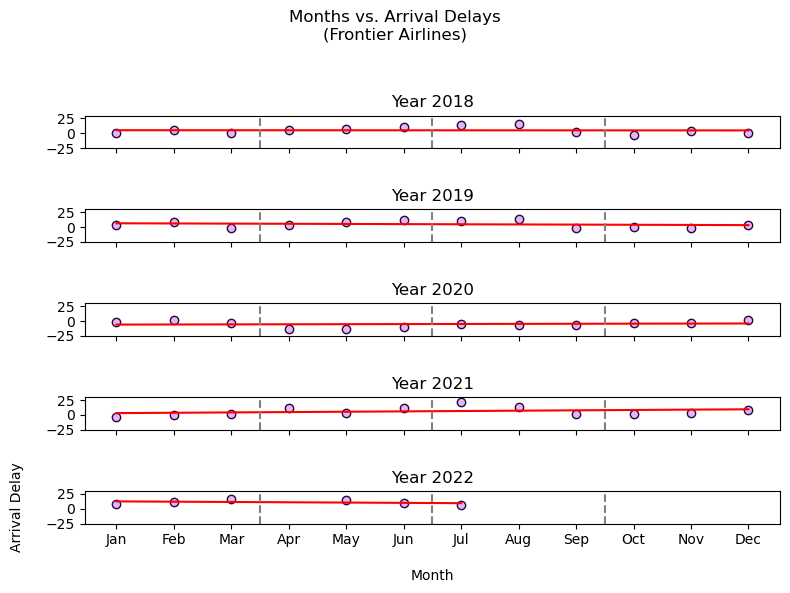

In [108]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 6), sharex=True)

# Iterating over each year and creating scatter plots
i=1-5
for i, year in enumerate(years2):
    #To choose the year in the DataFrame
    data = spirit_df[spirit_df["Year"] == year]
    
    #To choose the axis number
    ax = axes[i]
    
    #Plotting the scatter plot
    ax.scatter(data['Month'], data['Arrival Delay'], color = "#e4b5f7", edgecolor = "#2a0638")
    
    #Plotting the Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(data['Month'], data['Arrival Delay'])
    regress_values1 = data['Month'] * slope + intercept
    ax.plot(data['Month'],regress_values1,"r-")
    
    #Dividing the graph to represent each quarterly 
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.axvline(x=6.5, color='gray', linestyle='--')
    ax.axvline(x=9.5, color='gray', linestyle='--')
    
    #Giving the title to each subplot
    ax.set_title("\nYear "+ str(year))
    
    #Setting the y limits
    ax.set_ylim(-25, 30)
    
#     ax.set_ylim(data['Departure Delay'].min(), data['Departure Delay'].max())
    
    #Marking each month on the x-axis
    ax.set_xticks(range(1, 13))  
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 

#Providing labels for the graph
plt.xlabel('\nMonth')
plt.ylabel('Arrival Delay\n')
fig.suptitle("Months vs. Arrival Delays\n(Frontier Airlines)\n")

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()